In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

# Question 1 - Program to analyze the sneaker sales

In [2]:
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
data.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
data.isnull().any()

order_id          False
shop_id           False
user_id           False
order_amount      False
total_items       False
payment_method    False
created_at        False
dtype: bool

### Time does not have correct data type, convert it to datetime.

In [5]:
#check for the datatype
data.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [6]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [7]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [8]:
data['order_amount'].quantile([.0, 0.01, 0.25, .5, 0.75, 0.98, 1])

0.00        90.00
0.01       101.00
0.25       163.00
0.50       284.00
0.75       390.00
0.98       800.08
1.00    704000.00
Name: order_amount, dtype: float64

In [9]:
data['order_amount'].mean()

3145.128

Here the current AOV value is 3145 which seems too much considering that sneakers can be relatively cheaper. If we look at the distribution of the amount we can see that roughly 98 percent of them falls within 800 and there are outliers with maximum value being $700k. There could be multiple reasons behind that, one is that sometimes the owner itself buys the product in bulk to increase the demand of the products, we can look at the user_id and figure out if that is the case. Second is that this could be some fraud activity going on which needs to be looked at. May be the data is incorrect and hence we see such large values. But definitely the outliers is the reason why we see such a large AOV value.

Also I am not sure if this is the correct way to look at the average order value. In my opinion the AOV should be calculated as total revenue / total number of orders

In [10]:
data['order_amount'].sum() / data['total_items'].sum()

357.92152221412965

The correct value of AOV is $358

We can also further look at the AOV value by the payment method to see what does a user prefer

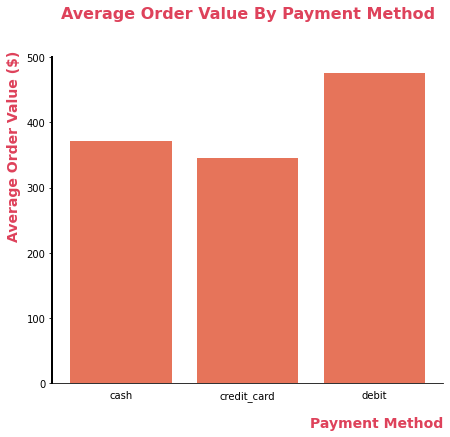

In [11]:
payment_methods = data['order_amount'].groupby(data['payment_method']).sum() / data['total_items'].groupby(data['payment_method']).sum()

fig,ax = plt.subplots(figsize=(7,6),)
x = ['cash', 'credit_card', 'debit']
ax.bar(x,payment_methods, color='#e6745a')
ax.set_title('Average Order Value By Payment Method',fontsize=16,weight='bold',y=1.1,color='#de425b')
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.xaxis.set_ticks_position('none') 
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel(("Average Order Value ($)"),color = '#de425b', weight='bold',fontsize=14) 
ax.set_xlabel("Payment Method",color = '#de425b', weight='bold',fontsize=14)

ax.xaxis.set_label_coords(0.83, -0.1) 
ax.yaxis.set_label_coords(-0.08, 0.73) 
plt.show()

From the plot we can look that the debit card has the highest average order value.